The Disccusion Below is all about the enviroment analysing of Toronto

* Introduction

The increase in the industrial pollution produced by Toronto,
Ontario is negatively impacting the city’s environmental conditions.
Although the Ministry of Environment and Climate Change has attempted to improve environment, efforts require continual re-focusing to remain effective. After research and discussion, four main
factors that can affect the environment were identified: tree cover,
pollutants released to air, pollutant carcinogenic Toxic Equivalency
Potentials (TEP) score, and pollutant non-carcinogenic TEP score.
A program which outputs a list of neighbourhoods in dire environmental condition was designed based on those four main factors
and general analysis. This program uses an input of several datasets from the Open Data Toronto database. Possible solutions to pollution and areas of environmental improvement are ultimately suggested, with the objective being to raise environmental awareness.

Using general statistical analysis on relevant environmental information collected from Open Data Toronto database, the research
on Toronto’s environmental conditions was conducted to determine
possible areas of improvement in the neighbourhoods of the city.
Four main factors that could affect the environment were identified:
pollutants released to air, pollutant carcinogenic TEP score, pollutant non-carcinogenic TEP score, and tree cover


**Method**

The primary tool chosen for data analysis was Python, a highlevel programming language. The data was from three files
The name of each neighbourhood, neighbourhood ID, total area,
total population, green rebate programs, green space, pollutant
carcinogenic TEP score, non-carcinogenic TEP score, pollutants
released to air, and tree cover were put to the first input file (Input.
txt). The renewable energy information was put in another file which
contained the following information: the name of each project, the
neighbourhood it was built in, type, size, and year of initial installation.
If two neighbourhoods have the same amount of pollutants, then
the neighbourhood with a smaller area will be considered to possess a worse environmental condition. This is under the assumption that the other factors are the same. Due to this, each factor is
divided by the total geographical area of that neighbourhood. For
instance, instead of using “pollutant carcinogenic TEP score”, “pollutant carcinogenic TEP score per unit of area” is placed to make
the evaluation fair. 

Analysing

In [155]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt

!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim

!conda install -c conda-forge folium=0.5.0 --yes
import folium 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

/kaggle/input/toronto/wellbeing-toronto-environment1.xlsx
/kaggle/input/neighborhoods/neighborhoods.csv


In [156]:
description=pd.read_excel('/kaggle/input/toronto/wellbeing-toronto-environment1.xlsx')
description.head()

,PROVENANCE,SHORT_NAME,LONG_NAME,DESCRIPTION,URL,CURRENCY,DATE_UPDATED,DOMAIN
0,"City of Toronto, Parks Forestry & Recreation",Tree Cover,Tree Cover/Canopy by neighbourhood,"For Reference Period 2008: City of Toronto, Pa...",http://www.toronto.ca/trees/index.htm,2011-04-25,2013-03-21 09:56:08,Environment
1,"City of Toronto, Environment Office",City Green Retrofits,City Facilities Green Retrofits 2002-2008,For Reference Period 2008: Count of City of To...,http://www.toronto.ca/teo,2011-04-25,2013-03-21 09:56:38,Environment
2,Federal Ministry of the Environment,Polluting Facilities,National Pollutant Release Inventory Facilitie...,For Reference Period 2008: Federal Ministry of...,http://www.ec.gc.ca/inrp-npri/default.asp,2011-04-25,2013-03-21 09:57:25,Environment
3,"City of Toronto, Parks Forestry & Recreation",Green Spaces,Green/Open Spaces,"For Reference Period 2008: City of Toronto, Pa...",http://www.toronto.ca/parks,2011-04-25,2013-03-27 11:24:50,Environment
4,Toronto Water,Green Rebate Programs,Water-Saving Rebate Program (toilets and washi...,"For Reference Period 2008: City of Toronto, To...",http://www.toronto.ca/water,2011-04-25,2013-03-18 10:02:32,Environment


In [157]:
address = 'Toronto, Ontario Canada'
geolocator = Nominatim(user_agent='ny_explorer')
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('Latitude and Longitude of Toronto is',latitude, longitude)

Latitude and Longitude of Toronto is 43.6534817 -79.3839347


In [158]:
neighborhood=pd.read_csv('/kaggle/input/neighborhoods/neighborhoods.csv')
neighborhood.head()

,Neighbourhood,Neighbourhood Id,Green Rebate Programs,Green Spaces,Pollutant Carcinogenic TEP Score,Pollutant Non-Carcinogenic TEP Score,Pollutants Released to Air,Tree Cover
0,West Humber-Clairville,1,428,2.078836,5737.87,18658529.73,1585690,2.895861e+06
1,Mount Olive-Silverstone-Jamestown,2,250,1.048870,29.76,2015.00,31,1.303945e+06
2,Thistletown-Beaumond Heights,3,118,0.939108,0.00,0.00,0,1.499130e+06
3,Rexdale-Kipling,4,121,0.240663,0.00,37632.00,35920,7.563823e+05
4,Elms-Old Rexdale,5,73,0.730090,0.00,309.00,309,9.975108e+05


Breaking the table into two tables 

In [159]:
neigh1=neighborhood.iloc[0:70]
neigh2=neighborhood.iloc[70:]

In [160]:
neighborhood=neighborhood.set_index('Neighbourhood')


Table1

In [161]:
neigh1

,Neighbourhood,Neighbourhood Id,Green Rebate Programs,Green Spaces,Pollutant Carcinogenic TEP Score,Pollutant Non-Carcinogenic TEP Score,Pollutants Released to Air,Tree Cover
0,West Humber-Clairville,1,428,2.078836,5737.87,18658529.73,1585690,2.895861e+06
1,Mount Olive-Silverstone-Jamestown,2,250,1.048870,29.76,2015.00,31,1.303945e+06
2,Thistletown-Beaumond Heights,3,118,0.939108,0.00,0.00,0,1.499130e+06
3,Rexdale-Kipling,4,121,0.240663,0.00,37632.00,35920,7.563823e+05
4,Elms-Old Rexdale,5,73,0.730090,0.00,309.00,309,9.975108e+05
...,...,...,...,...,...,...,...,...
65,Danforth,66,140,0.001837,0.00,0.00,0,2.822127e+05
66,Playter Estates-Danforth,67,78,0.059229,487.68,33020.00,508,3.134337e+05
67,North Riverdale,68,151,0.322166,0.00,0.00,0,5.964339e+05
68,Blake-Jones,69,119,0.017039,0.00,850.00,850,2.446367e+05


Table 2

In [162]:
neigh2

,Neighbourhood,Neighbourhood Id,Green Rebate Programs,Green Spaces,Pollutant Carcinogenic TEP Score,Pollutant Non-Carcinogenic TEP Score,Pollutants Released to Air,Tree Cover
70,Cabbagetown-South St.James Town,71,102,0.246257,227.52,20015405.0,241,6.279702e+05
71,Regent Park,72,25,0.014814,0.00,0.0,0,1.224451e+05
72,Moss Park,73,70,0.098699,0.00,8732.0,3692,2.125641e+05
73,North St.James Town,74,14,0.025783,0.00,0.0,0,6.161624e+04
74,Church-Yonge Corridor,75,144,0.061521,42.24,4397.6,1092,1.185414e+05
...,...,...,...,...,...,...,...,...
135,West Hill,136,338,1.993607,104759.13,54076528.3,371626,3.403338e+06
136,Woburn,137,600,1.354012,0.00,17463.8,2357,2.746208e+06
137,Eglinton East,138,209,0.233049,27469.60,901516.8,4410,6.563212e+05
138,Scarborough Village,139,115,0.286328,0.00,0.0,0,1.127497e+06


Study about Green Rebate Programs

An Energy Rebate Program, or Energy Credit Incentive Program, provides a cash rebate program for customers planning to install new, energy efficient information technology (IT) equipment or cooling systems. These programs push companies to construct more energy efficient data centers, or to consolidate compute, storage and networking resources via virtualization technologies.

An Energy Rebate Program is a simple way for customers to apply and qualify for various energy rebates offered by energy service companies, or utilities, in their respective coverage areas. To lower IT equipment's carbon footprint, data center customers are looking at processes for protecting and respecting the environment through eco-friendly operations and data center design. This idea is being pushed by organizations such as The Green Grid, Climate Savers Computing Initiative and the Silicon Valley Leadership Group. Customer demand for energy rebates encourages the development of programs for IT vendors' computers, storage, networking or data center facilities. IT vendors are taking steps to provide more energy efficient IT systems and working with utilities to secure rebate savings for customers and their new installations.

In [163]:
print('Maximum number of  Green Rebate Programs are at',neighborhood['Green Rebate Programs'].idxmax(),'with',neighborhood['Green Rebate Programs'].max(),'programs')

Maximum number of  Green Rebate Programs are at Milliken with 815 programs


Representing for all Neighborhoods

Text(0.5, 0, 'Neighbrhoods')

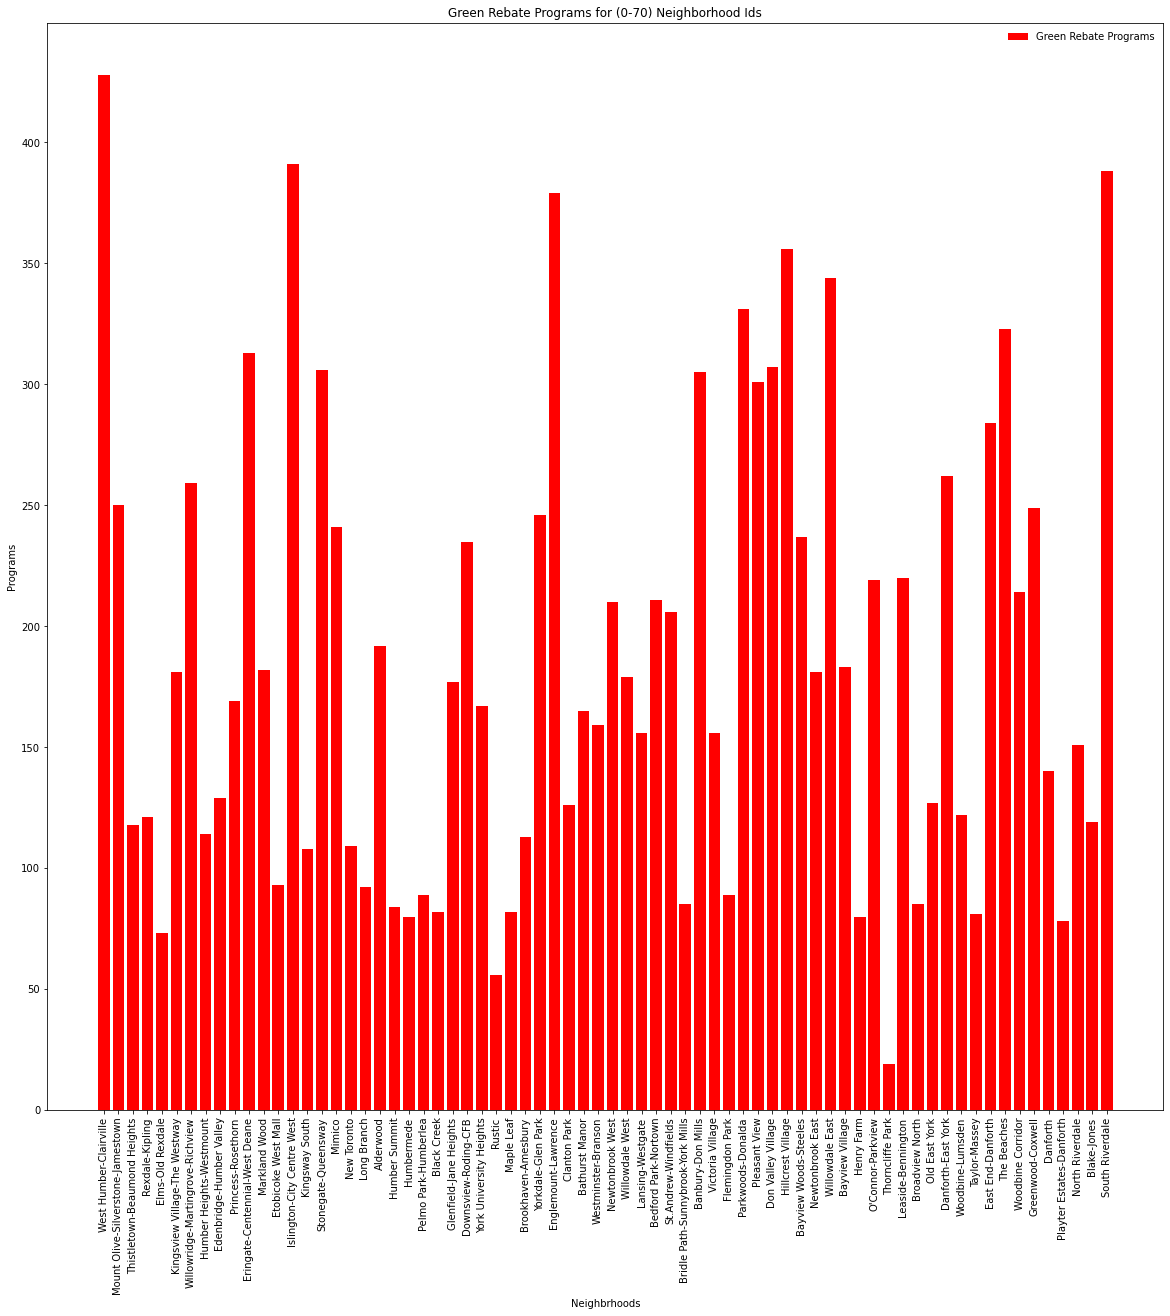

In [164]:
plt.figure(figsize=(20,20))
plt.bar(neigh1['Neighbourhood'],neigh1['Green Rebate Programs'],linewidth=3,color='red')
plt.legend(['Green Rebate Programs'],loc='best',frameon=False)
ax=plt.gca()
for x in ax.xaxis.get_ticklabels():
    x.set_rotation(90)
plt.title('Green Rebate Programs for (0-70) Neighborhood Ids')
plt.ylabel('Programs')
plt.xlabel('Neighbrhoods')

Text(0.5, 0, 'Neighborhoods')

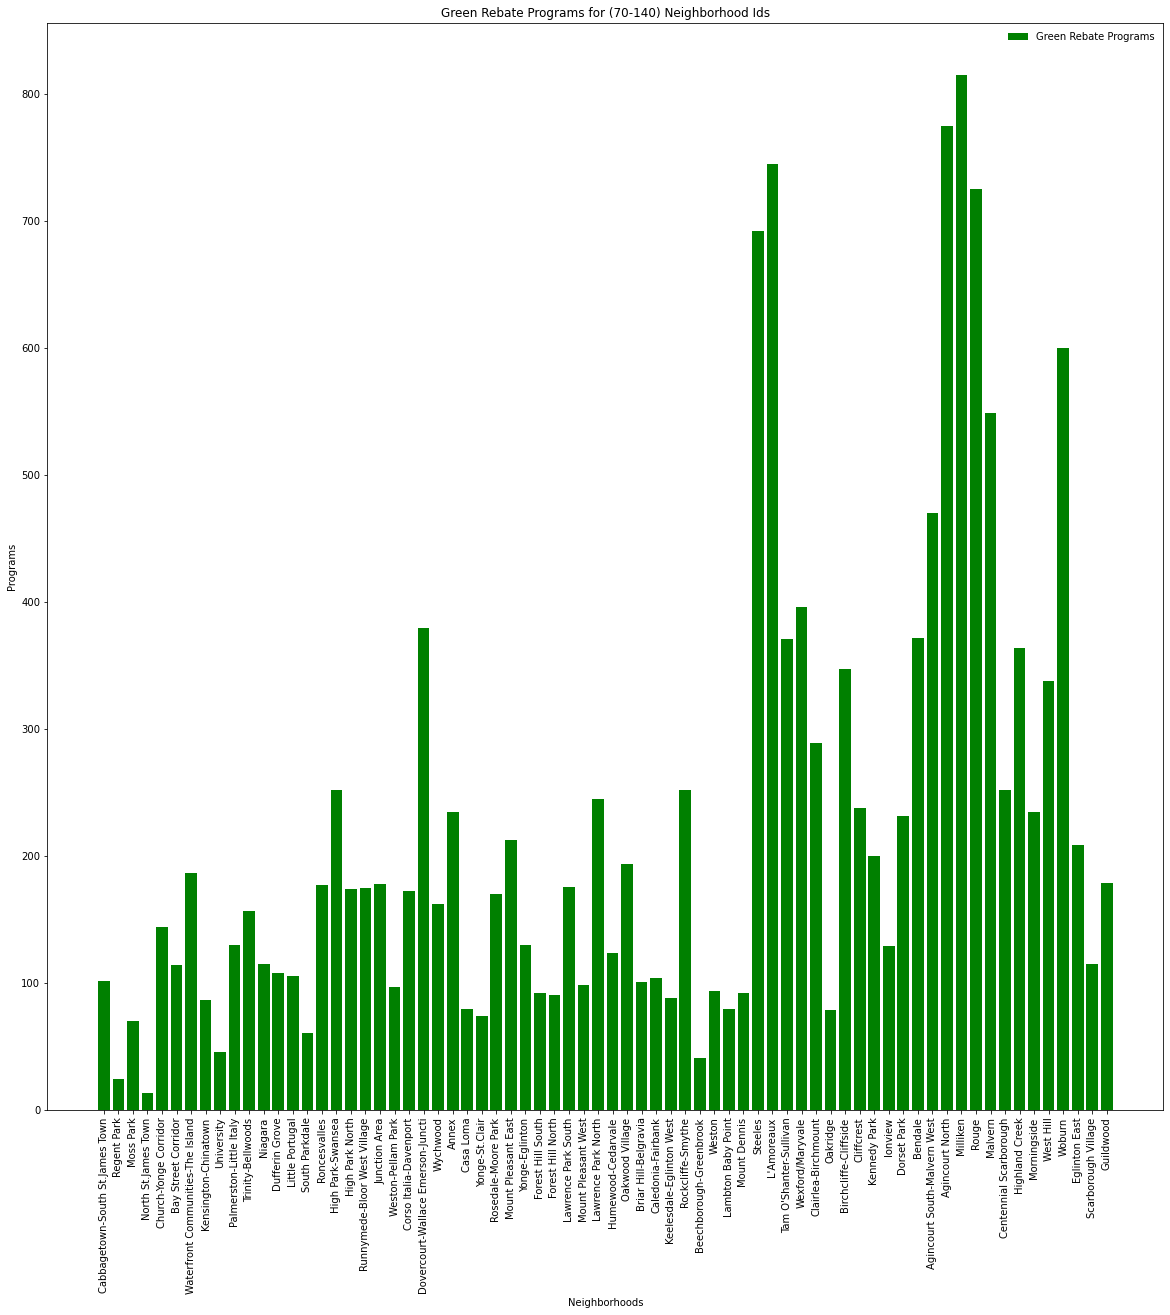

In [165]:
plt.figure(figsize=(20,20))
plt.bar(neigh2['Neighbourhood'],neigh2['Green Rebate Programs'],linewidth=3,color='green')
plt.legend(['Green Rebate Programs'],loc='best',frameon=False)
ax=plt.gca()
for x in ax.xaxis.get_ticklabels():
    x.set_rotation(90)
plt.title('Green Rebate Programs for (70-140) Neighborhood Ids')
plt.ylabel('Programs')
plt.xlabel('Neighborhoods')

Study about Green Spaces

Open space is any open piece of land that is undeveloped (has no buildings or other built structures) and is accessible to the public. Open space can include:

Green space (land that is partly or completely covered with grass, trees, shrubs, or other vegetation). Green space includes parks, community gardens, and cemeteries.
Schoolyards
Playgrounds
Public seating areas
Public plazas
Vacant lots
Open space provides recreational areas for residents and helps to enhance the beauty and environmental quality of neighborhoods. But with this broad range of recreational sites comes an equally broad range of environmental issues. Just as in any other land uses, the way parks are managed can have good or bad environmental impacts, from pesticide runoff, siltation from overused hiking and logging trails, and destruction of habitat.

In [166]:
print('Maximum Green Space land is at',neighborhood['Green Spaces'].idxmax(),'with',neighborhood['Green Spaces'].max(),' Sq.Kms area')

Maximum Green Space land is at Rouge with 14.27145522  Sq.Kms area


Representing for all Neighborhood

Text(0.5, 0, 'Neighborhood')

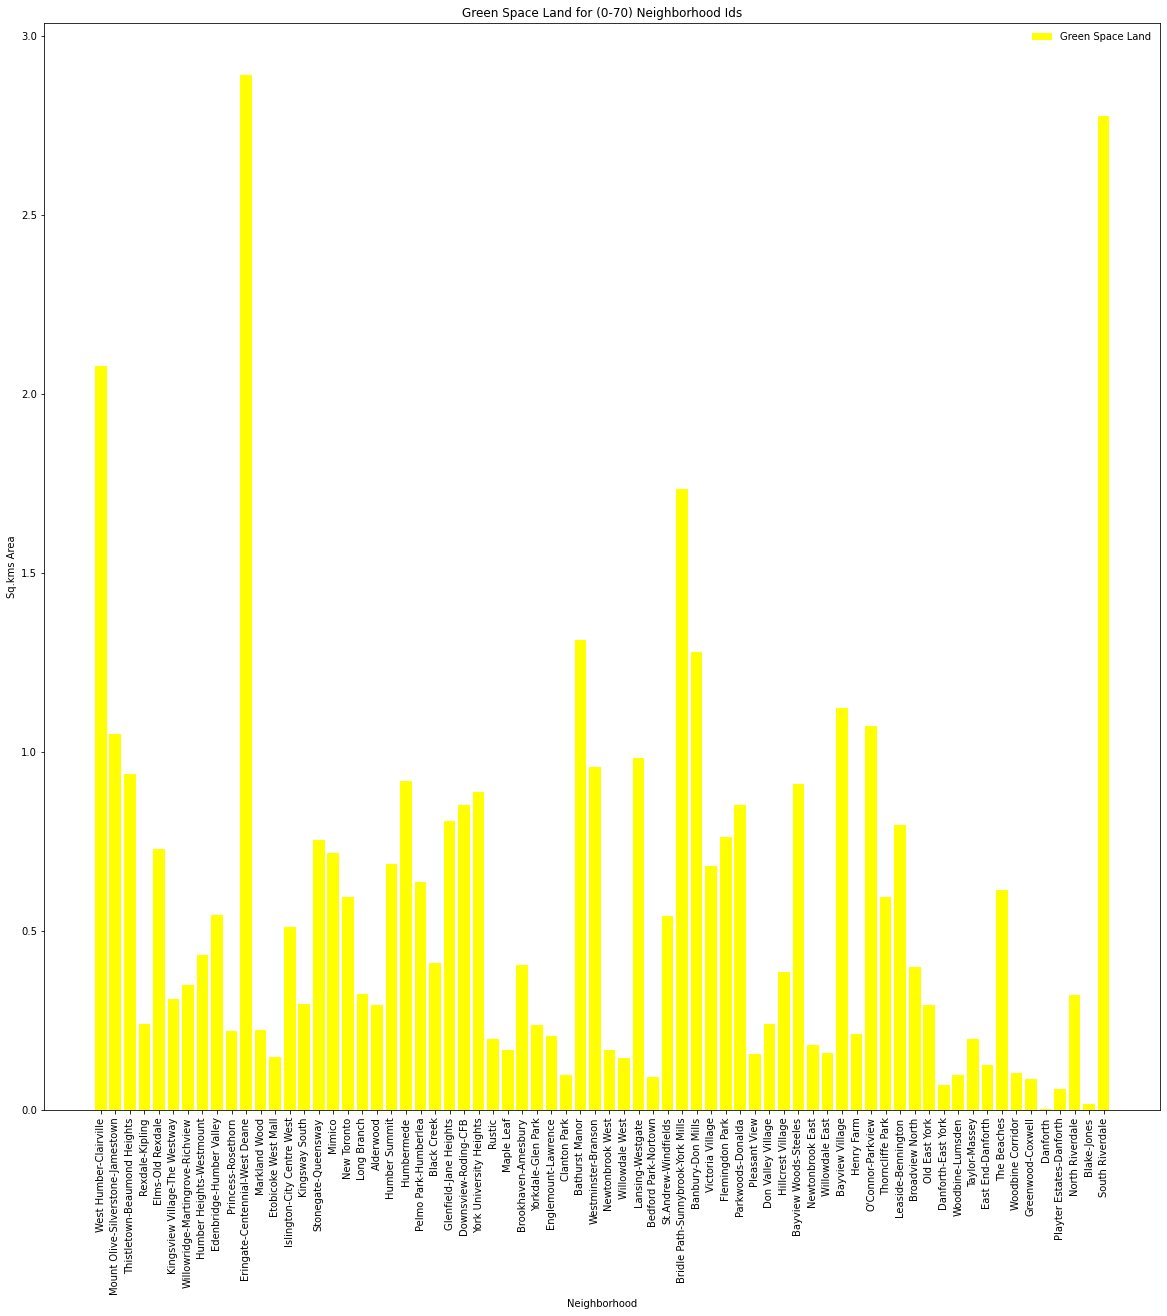

In [167]:
plt.figure(figsize=(20,20))
plt.bar(neigh1['Neighbourhood'],neigh1['Green Spaces'],linewidth=3,color='yellow')
plt.legend(['Green Space Land'],loc='best',frameon=False)
ax=plt.gca()
for x in ax.xaxis.get_ticklabels():
    x.set_rotation(90)
plt.title('Green Space Land for (0-70) Neighborhood Ids')
plt.ylabel('Sq.kms Area')
plt.xlabel('Neighborhood')

Text(0.5, 0, 'Neighborhood')

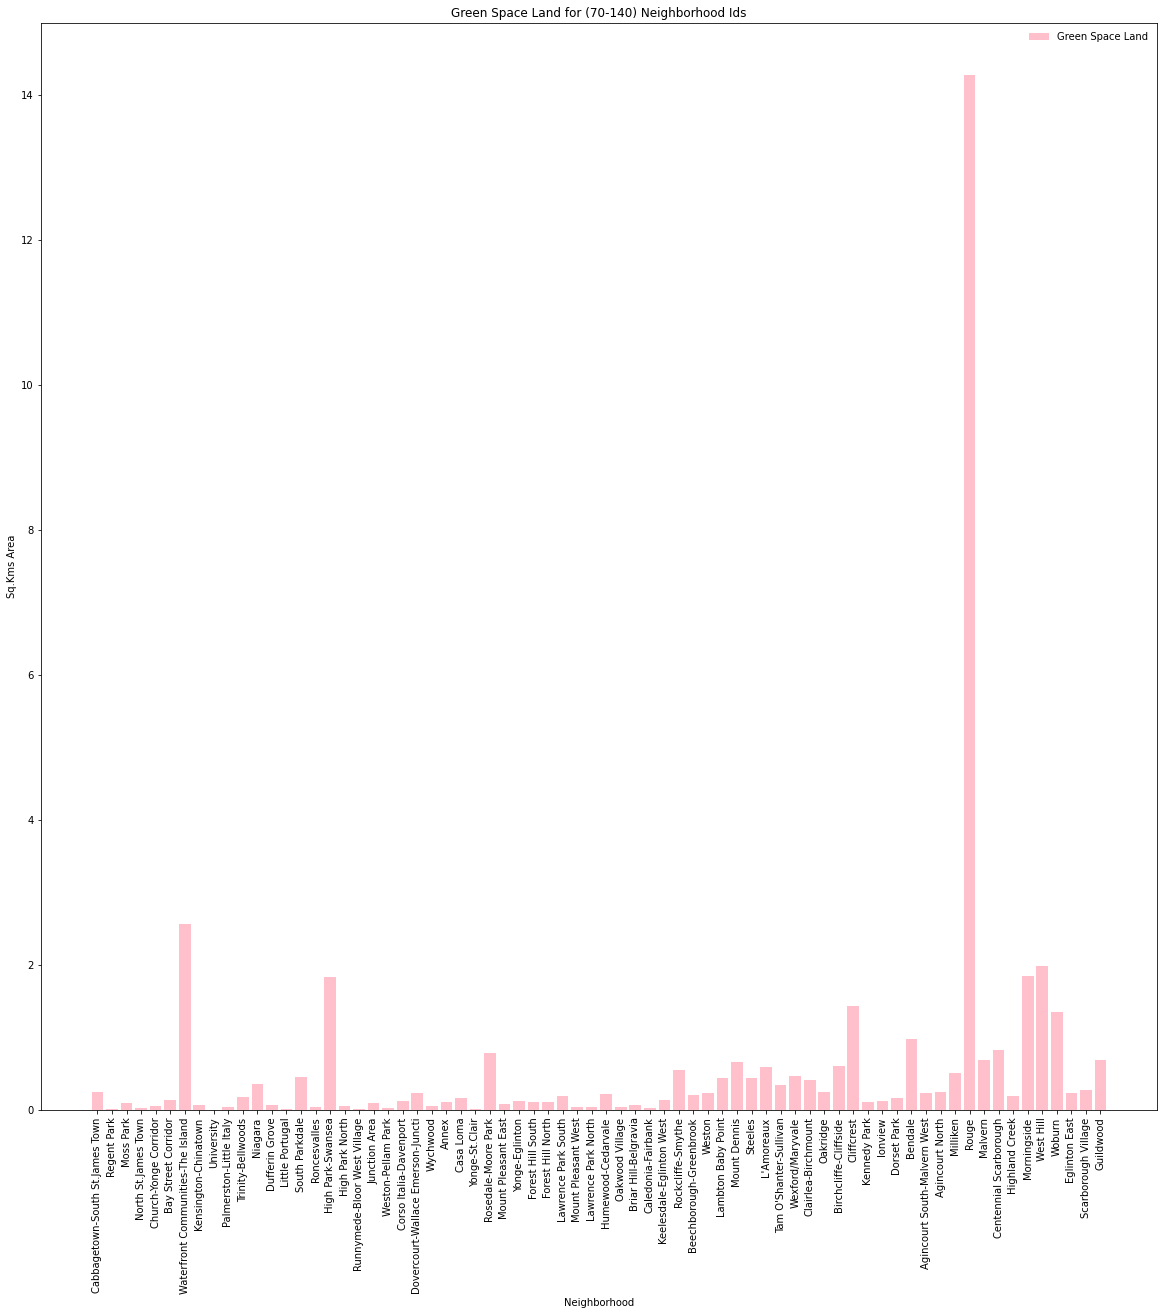

In [168]:
plt.figure(figsize=(20,20))
plt.bar(neigh2['Neighbourhood'],neigh2['Green Spaces'],linewidth=3,color='pink')
plt.legend(['Green Space Land'],loc='best',frameon=False)
ax=plt.gca()
for x in ax.xaxis.get_ticklabels():
    x.set_rotation(90)
plt.title('Green Space Land for (70-140) Neighborhood Ids')
plt.ylabel('Sq.Kms Area')
plt.xlabel('Neighborhood')

Study about the Pollutant Score 

A pollutant is a substance or energy introduced into the environment that has undesired effects, or adversely affects the usefulness of a resource. A pollutant may cause long- or short-term damage by changing the growth rate of plant or animal species, or by interfering with human amenities, comfort, health, or property values. Some pollutants are biodegradable and therefore will not persist in the environment in the long term. However, the degradation products of some pollutants are themselves polluting such as the products DDE and DDD produced from the degradation of DDT.

Pollutants, towards which the environment has low absorptive capacity are called stock pollutants.[1] (e.g. persistent organic pollutants such as PCBs, non-biodegradable plastics and heavy metals). Stock pollutants accumulate in the environment over time. The damage they cause increases as more pollutant is emitted, and persists as the pollutant accumulates. Stock pollutants can create a burden for the future generations, bypassing on the damage that persists well after the benefits received from incurring that damage, have been forgotten

Notable pollutants include the following groups

Mercury Hg,
Persistent organic pollutants POPs,
Ozone Ozone,
Particulate matter PM,
Environmental Persistent Pharmaceutical Pollutants EPPP,
Polycyclic aromatic hydrocarbons PAHs,
Volatile organic compounds VOCs

What is Carinogen?


A carcinogen is any substance, radionuclide, or radiation that promotes carcinogenesis, the formation of cancer. This may be due to the ability to damage the genome or to the disruption of cellular metabolic processes. Several radioactive substances are considered carcinogens, but their carcinogenic activity is attributed to the radiation, for example gamma rays and alpha particles, which they emit. Common examples of non-radioactive carcinogens are inhaled asbestos, certain dioxins, and tobacco smoke. Although the public generally associates carcinogenicity with synthetic chemicals, it is equally likely to arise in both natural and synthetic substances.[1] Carcinogens are not necessarily immediately toxic; thus, their effect can be insidious.

Something that is not known to cause cancer is Non Carcinogen

 The next factor is the Pollutant Carcinogenic
TEP score. TEP indicate the relative health risk associated with the
release of one pound of a chemical. The Pollutant Carcinogenic TEP
score is a general score measuring how various chemicals affect the
environment and increase the risk of cancer


The Pollutant non-carcinogenic TEP score refers to non-carcinogenic compounds which, negatively affect the environmental conditions of the neighbourhoods. Non-carcinogenic pollutants can contribute to the build-up of greenhouse gases. 

In [169]:
neighborhood.corr()

,Neighbourhood Id,Green Rebate Programs,Green Spaces,Pollutant Carcinogenic TEP Score,Pollutant Non-Carcinogenic TEP Score,Pollutants Released to Air,Tree Cover
Neighbourhood Id,1.000000,0.284599,0.060945,-0.052405,-0.045265,-0.137113,-0.017017
Green Rebate Programs,0.284599,1.000000,0.370050,0.012705,0.027892,0.206497,0.459341
Green Spaces,0.060945,0.370050,1.000000,0.043634,0.085224,0.141225,0.851432
Pollutant Carcinogenic TEP Score,-0.052405,0.012705,0.043634,1.000000,0.304657,0.154737,0.080975
Pollutant Non-Carcinogenic TEP Score,-0.045265,0.027892,0.085224,0.304657,1.000000,0.338007,0.119701
Pollutants Released to Air,-0.137113,0.206497,0.141225,0.154737,0.338007,1.000000,0.156577
Tree Cover,-0.017017,0.459341,0.851432,0.080975,0.119701,0.156577,1.000000


the number of
polluting facilities has a correlation coefficient of 0.3367 with
the amount of pollutants released to air. To further utilize the
result, the companies producing the pollutants in those neighbourhoods need to be found. Setting up a tighter limit on the
allowed numbers of pollutants released can be an effective
method to reduce the values.

In [170]:
print('Maximum Pollutant Carcinogenic Score is at',neighborhood['Pollutant Carcinogenic TEP Score'].idxmax(),'with',neighborhood['Pollutant Carcinogenic TEP Score'].max(),' score')

Maximum Pollutant Carcinogenic Score is at York University Heights with 205788.1  score


In [171]:
print('Maximum Pollutant Non-Carcinogenic Score is at',neighborhood['Pollutant Non-Carcinogenic TEP Score'].idxmax(),'with',neighborhood['Pollutant Non-Carcinogenic TEP Score'].max(),' score')

Maximum Pollutant Non-Carcinogenic Score is at West Hill with 54076528.3  score


Representing  Pollutant Carcinogenic Score

Text(0.5, 0, 'Neighborhood Ids')

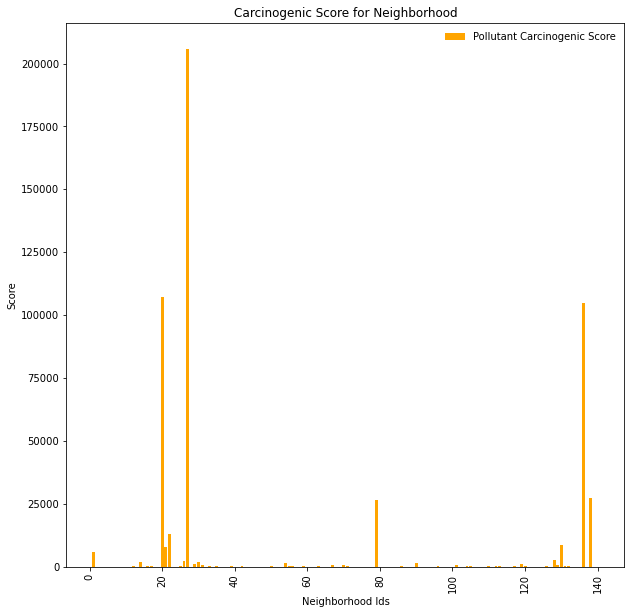

In [172]:
plt.figure(figsize=(10,10))
plt.bar(neighborhood['Neighbourhood Id'],neighborhood['Pollutant Carcinogenic TEP Score'],linewidth=3,color='orange')
plt.legend(['Pollutant Carcinogenic Score'],loc='best',frameon=False)
ax=plt.gca()
for x in ax.xaxis.get_ticklabels():
    x.set_rotation(90)
plt.title('Carcinogenic Score for Neighborhood')
plt.ylabel('Score')
plt.xlabel('Neighborhood Ids')

In [173]:
print('Neighborhood that is safe and with least Score is',neighborhood['Pollutant Carcinogenic TEP Score'].idxmin())

Neighborhood that is safe and with least Score is Thistletown-Beaumond Heights


Non-carcinogenic pollutants, though not as important as those which are
carcinogenic, can contribute to the build-up of greenhouse gases and a longterm environmental influence, indicating an overall environmental standard. The
sifting of this factor may further narrow the scope of the final set

Representing Pollutant Non-Carcinogenic Score

Text(0.5, 0, 'Neighborhood Ids')

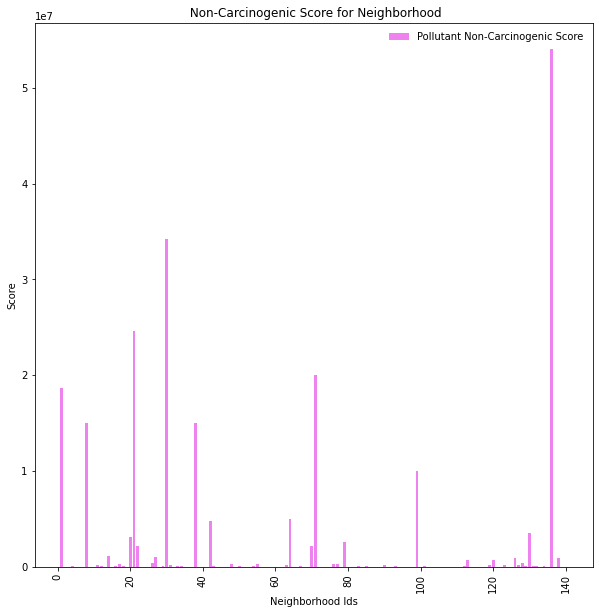

In [174]:
plt.figure(figsize=(10,10))
plt.bar(neighborhood['Neighbourhood Id'],neighborhood['Pollutant Non-Carcinogenic TEP Score'],linewidth=3,color='violet')
plt.legend(['Pollutant Non-Carcinogenic Score'],loc='best',frameon=False)
ax=plt.gca()
for x in ax.xaxis.get_ticklabels():
    x.set_rotation(90)
plt.title(' Non-Carcinogenic Score for Neighborhood')
plt.ylabel('Score')
plt.xlabel('Neighborhood Ids')

Released Pollutants

Text(0.5, 0, 'Neighborhood Ids')

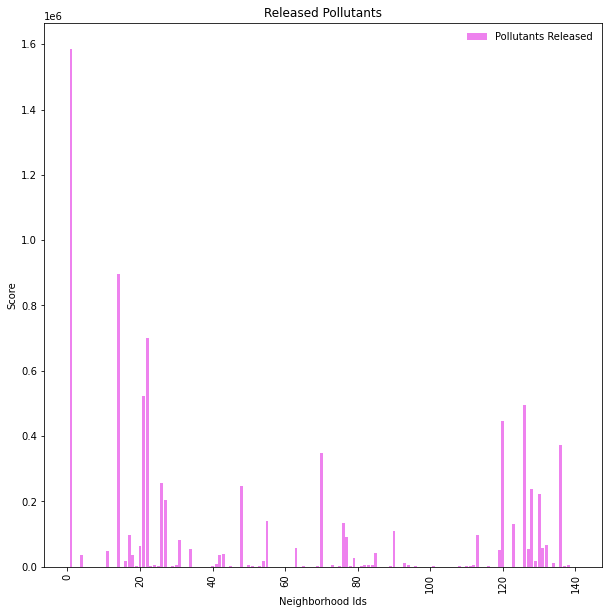

In [175]:
plt.figure(figsize=(10,10))
plt.bar(neighborhood['Neighbourhood Id'],neighborhood['Pollutants Released to Air'],linewidth=3,color='violet')
plt.legend(['Pollutants Released'],loc='best',frameon=False)
ax=plt.gca()
for x in ax.xaxis.get_ticklabels():
    x.set_rotation(90)
plt.title('Released Pollutants')
plt.ylabel('Score')
plt.xlabel('Neighborhood Ids')

Text(0.5, 1.0, 'Comparing Carcinogenic Score And Pollutants Released to Air')

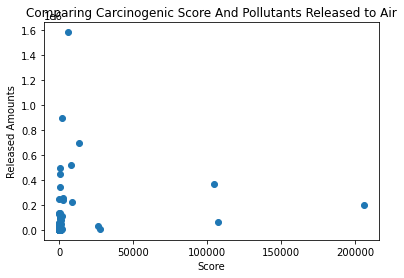

In [176]:
plt.scatter(neighborhood['Pollutant Carcinogenic TEP Score'],neighborhood['Pollutants Released to Air'])
plt.xlabel('Score')
plt.ylabel('Released Amounts')
plt.title('Comparing Carcinogenic Score And Pollutants Released to Air')

Text(0.5, 1.0, 'Comparing Non-Carcinogenic Score And Pollutants Released to Air')

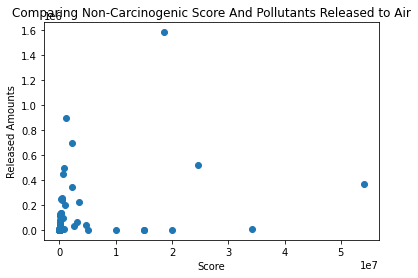

In [177]:
plt.scatter(neighborhood['Pollutant Non-Carcinogenic TEP Score'],neighborhood['Pollutants Released to Air'])
plt.xlabel('Score')
plt.ylabel('Released Amounts')
plt.title('Comparing Non-Carcinogenic Score And Pollutants Released to Air')

Study About the Tree Cover

 The last factor used is
the tree cover. The less tree covers a neighbourhood has, the more
space there is for industries, companies, and building. Ultimately,
this would result in higher production pollutants and carcinogens.
The tree cover was used to resolve the problem of two neighbourhoods with the same amount of pollutants, in which the tree cover
was be used to determine which neighbourhood needs immediate
attention over the other


Planting trees still being an important means of environmental improvement,
tree cover, as one of the four main factors chosen, works effectively to help
choose a group of immediate attention. Thus, given that all other factors are
similar, neighborhoods with less tree cover should be of priority.

In [178]:
print('Neighbourhood with maximum tree cover is',neighborhood['Tree Cover'].idxmax(),'with',neighborhood['Tree Cover'].max(),'Sq.km Area')

Neighbourhood with maximum tree cover is Rouge with 12888043.88 Sq.km Area


Text(0.5, 0, 'Neighborhood')

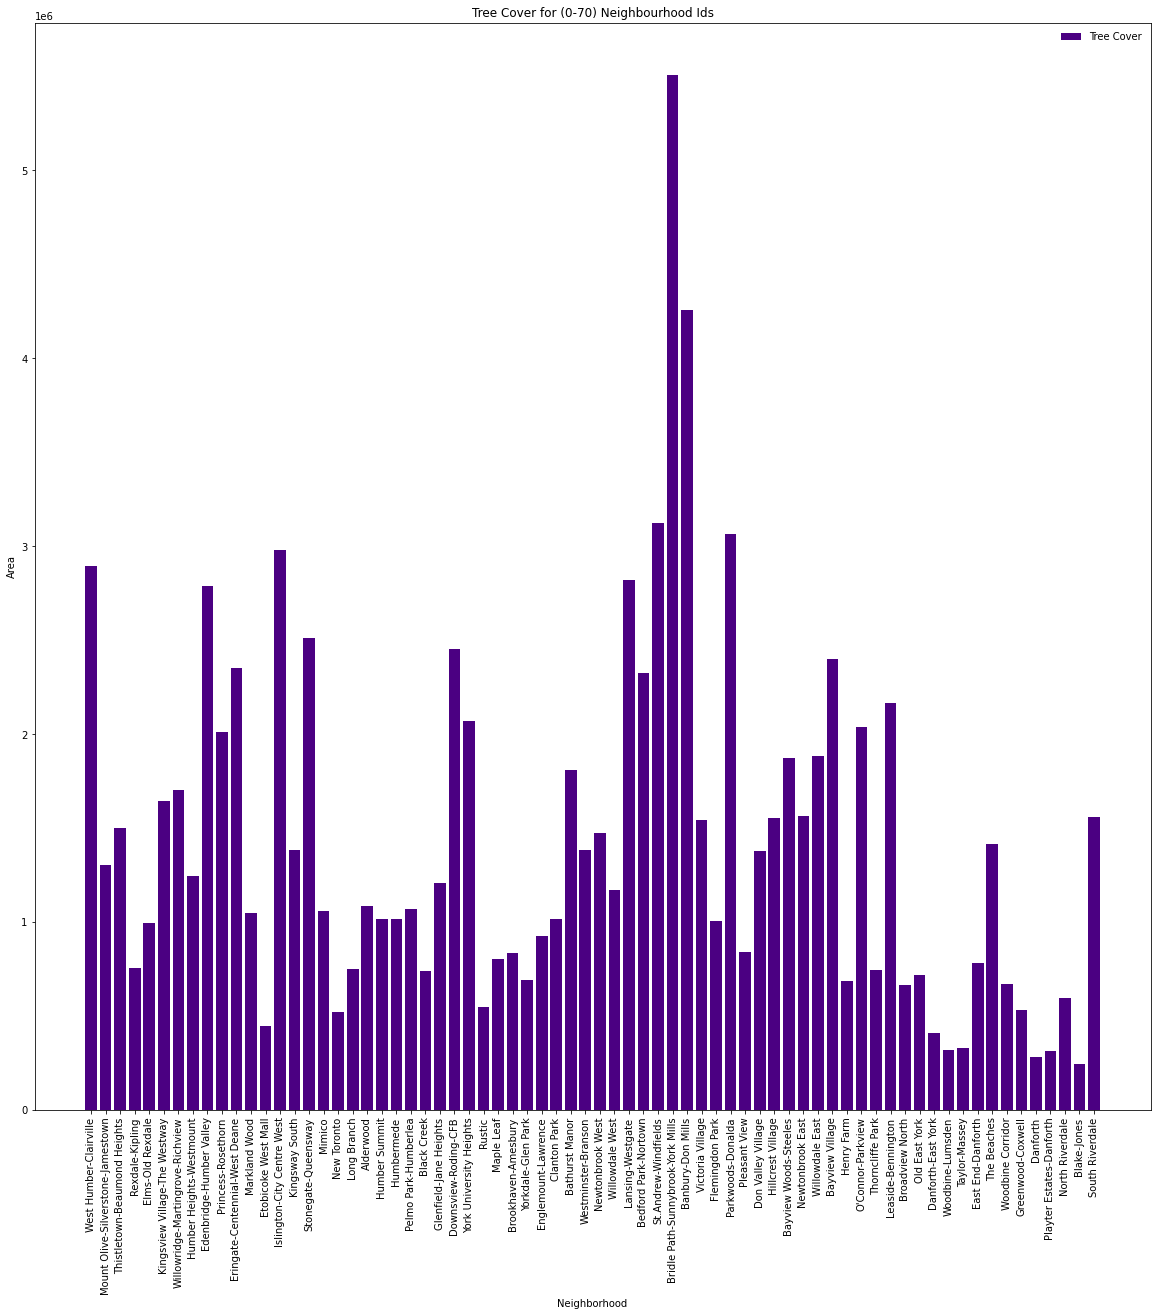

In [179]:
plt.figure(figsize=(20,20))
plt.bar(neigh1['Neighbourhood'],neigh1['Tree Cover'],linewidth=3,color='indigo')
plt.legend(['Tree Cover'],loc='best',frameon=False)
ax=plt.gca()
for x in ax.xaxis.get_ticklabels():
    x.set_rotation(90)
plt.title('Tree Cover for (0-70) Neighbourhood Ids')
plt.ylabel('Area')
plt.xlabel('Neighborhood')

Text(0.5, 0, 'Neighborhood')

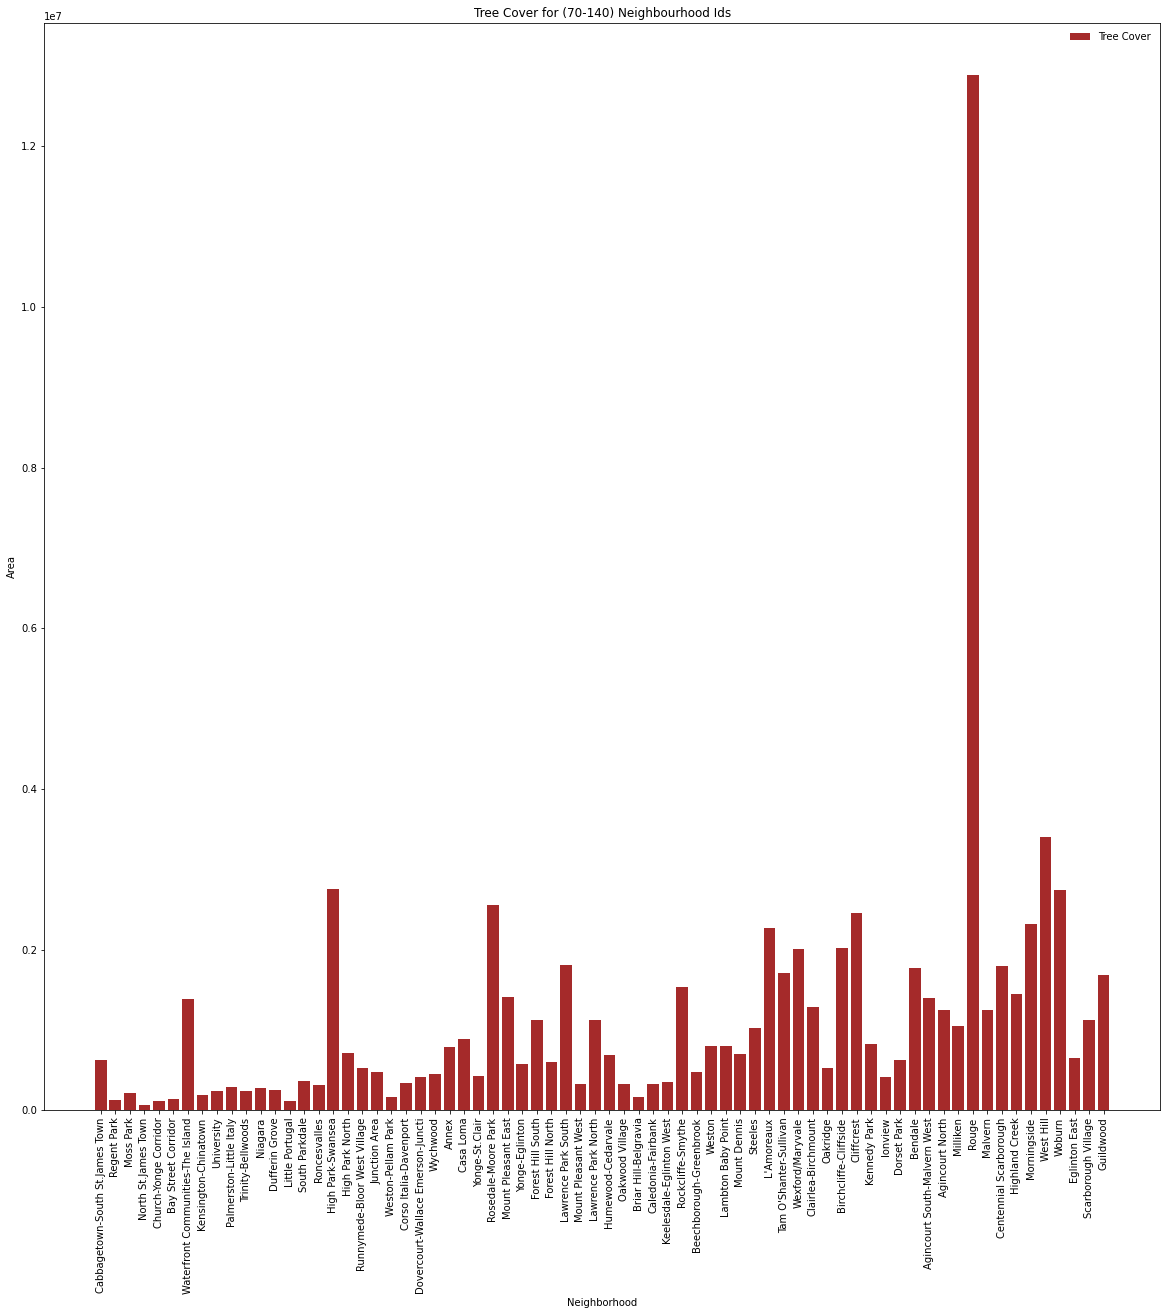

In [180]:
plt.figure(figsize=(20,20))
plt.bar(neigh2['Neighbourhood'],neigh2['Tree Cover'],linewidth=3,color='brown')
plt.legend(['Tree Cover'],loc='best',frameon=False)
ax=plt.gca()
for x in ax.xaxis.get_ticklabels():
    x.set_rotation(90)
plt.title('Tree Cover for (70-140) Neighbourhood Ids')
plt.ylabel('Area')
plt.xlabel('Neighborhood')

The Area of
Tree Cover has a correlation coefficient of 0.858 with
the Area of Green Space. Which is More the Green Space More The Tree cover

Clustering

In [181]:
from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler

In [182]:
X = neighborhood.values[:,1:]
X = np.nan_to_num(X)
Cluster = StandardScaler().fit_transform(X)
clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
neighborhood['Labels']=labels
neighborhood.head()

,Neighbourhood Id,Green Rebate Programs,Green Spaces,Pollutant Carcinogenic TEP Score,Pollutant Non-Carcinogenic TEP Score,Pollutants Released to Air,Tree Cover,Labels
Neighbourhood,,,,,,,,
West Humber-Clairville,1,428,2.078836,5737.87,18658529.73,1585690,2.895861e+06,2
Mount Olive-Silverstone-Jamestown,2,250,1.048870,29.76,2015.00,31,1.303945e+06,0
Thistletown-Beaumond Heights,3,118,0.939108,0.00,0.00,0,1.499130e+06,0
Rexdale-Kipling,4,121,0.240663,0.00,37632.00,35920,7.563823e+05,0
Elms-Old Rexdale,5,73,0.730090,0.00,309.00,309,9.975108e+05,0


In [183]:
neighborhood.groupby('Labels').mean()

,Neighbourhood Id,Green Rebate Programs,Green Spaces,Pollutant Carcinogenic TEP Score,Pollutant Non-Carcinogenic TEP Score,Pollutants Released to Air,Tree Cover
Labels,,,,,,,
0,71.712121,206.696970,0.564246,3102.363258,2.520922e+05,43694.522727,1.251157e+06
1,83.000000,225.500000,1.199782,53227.165000,4.416561e+07,188017.500000,2.119086e+06
2,39.666667,182.833333,0.752392,2291.881667,1.722099e+07,351408.500000,1.668406e+06


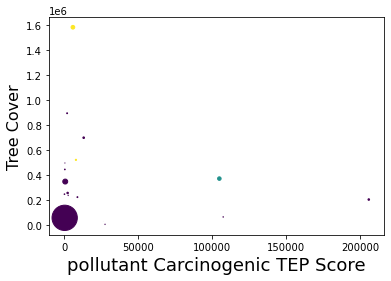

In [186]:
area = np.pi * ( X[:, 1])**2  
plt.scatter(X[:, 3], X[:, 5], s=area, c=labels.astype(np.float), alpha=2.5)
plt.xlabel('pollutant Carcinogenic TEP Score', fontsize=18)
plt.ylabel('Tree Cover', fontsize=16)

plt.show()
